This is the dirty script to build `Select` class in the `visualization.py`.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.style.use(['seaborn-colorblind', 'seaborn-talk'])
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta'] # to plot Chinese words properly

import datetime
date = datetime.datetime.now().strftime('%Y%m%d')

In [11]:
merge_df = pd.read_hdf('data/database_ZAF_clean_gps_20211104.hd5', key='wl')

In [3]:
merge_df.set_index('日期時間')

,井名,井號,水面至井口深度,Lon,Lat,月
日期時間,,,,,,
2005-03-09 15:18:00,二崙國小,4413,4.935,120.415102,23.771842,3
2005-05-13 15:29:00,二崙國小,4413,4.072,120.415102,23.771842,5
2005-08-15 15:15:00,二崙國小,4413,3.238,120.415102,23.771842,8
2005-11-11 15:26:00,二崙國小,4413,3.088,120.415102,23.771842,11
2006-02-15 15:07:00,二崙國小,4413,4.317,120.415102,23.771842,2
...,...,...,...,...,...,...
2021-09-21 23:10:00,東石(4),10090141,17.349,120.154469,23.460335,9
2021-09-21 23:20:00,東石(4),10090141,17.345,120.154469,23.460335,9
2021-09-21 23:30:00,東石(4),10090141,17.342,120.154469,23.460335,9


In [5]:
mask = (merge_df['日期時間']>='2021-05') & (merge_df['日期時間']<'2021-06')
merge_df[mask]

,井名,日期時間,井號,水面至井口深度,Lon,Lat,月
34799976,國聖(1),2021-05-01 00:00:00,7010111,3.933,120.569126,24.092658,5
34799977,國聖(1),2021-05-01 00:10:00,7010111,3.931,120.569126,24.092658,5
34799978,國聖(1),2021-05-01 00:20:00,7010111,3.932,120.569126,24.092658,5
34799979,國聖(1),2021-05-01 00:30:00,7010111,3.933,120.569126,24.092658,5
34799980,國聖(1),2021-05-01 00:40:00,7010111,3.934,120.569126,24.092658,5
...,...,...,...,...,...,...,...
35659641,東石(4),2021-05-26 10:10:00,10090141,20.599,120.154469,23.460335,5
35659642,東石(4),2021-05-26 10:20:00,10090141,20.595,120.154469,23.460335,5
35659643,東石(4),2021-05-26 10:30:00,10090141,20.594,120.154469,23.460335,5
35659644,東石(4),2021-05-26 10:40:00,10090141,20.595,120.154469,23.460335,5


In [6]:
mask = (merge_df['日期時間']>='2021-05') & (merge_df['日期時間']<'2021-06') & (merge_df['井號']==7010111)

In [31]:
df = merge_df[mask].set_index('日期時間').sort_values('日期時間')
p = np.polyfit(range(mask.sum()), df['水面至井口深度'], 1)

In [32]:
df

,井名,井號,水面至井口深度,Lon,Lat,月
日期時間,,,,,,
2021-05-01 00:00:00,國聖(1),7010111,3.933,120.569126,24.092658,5
2021-05-01 00:10:00,國聖(1),7010111,3.931,120.569126,24.092658,5
2021-05-01 00:20:00,國聖(1),7010111,3.932,120.569126,24.092658,5
2021-05-01 00:30:00,國聖(1),7010111,3.933,120.569126,24.092658,5
2021-05-01 00:40:00,國聖(1),7010111,3.934,120.569126,24.092658,5
...,...,...,...,...,...,...
2021-05-31 23:10:00,國聖(1),7010111,3.230,120.569126,24.092658,5
2021-05-31 23:20:00,國聖(1),7010111,3.229,120.569126,24.092658,5
2021-05-31 23:30:00,國聖(1),7010111,3.229,120.569126,24.092658,5


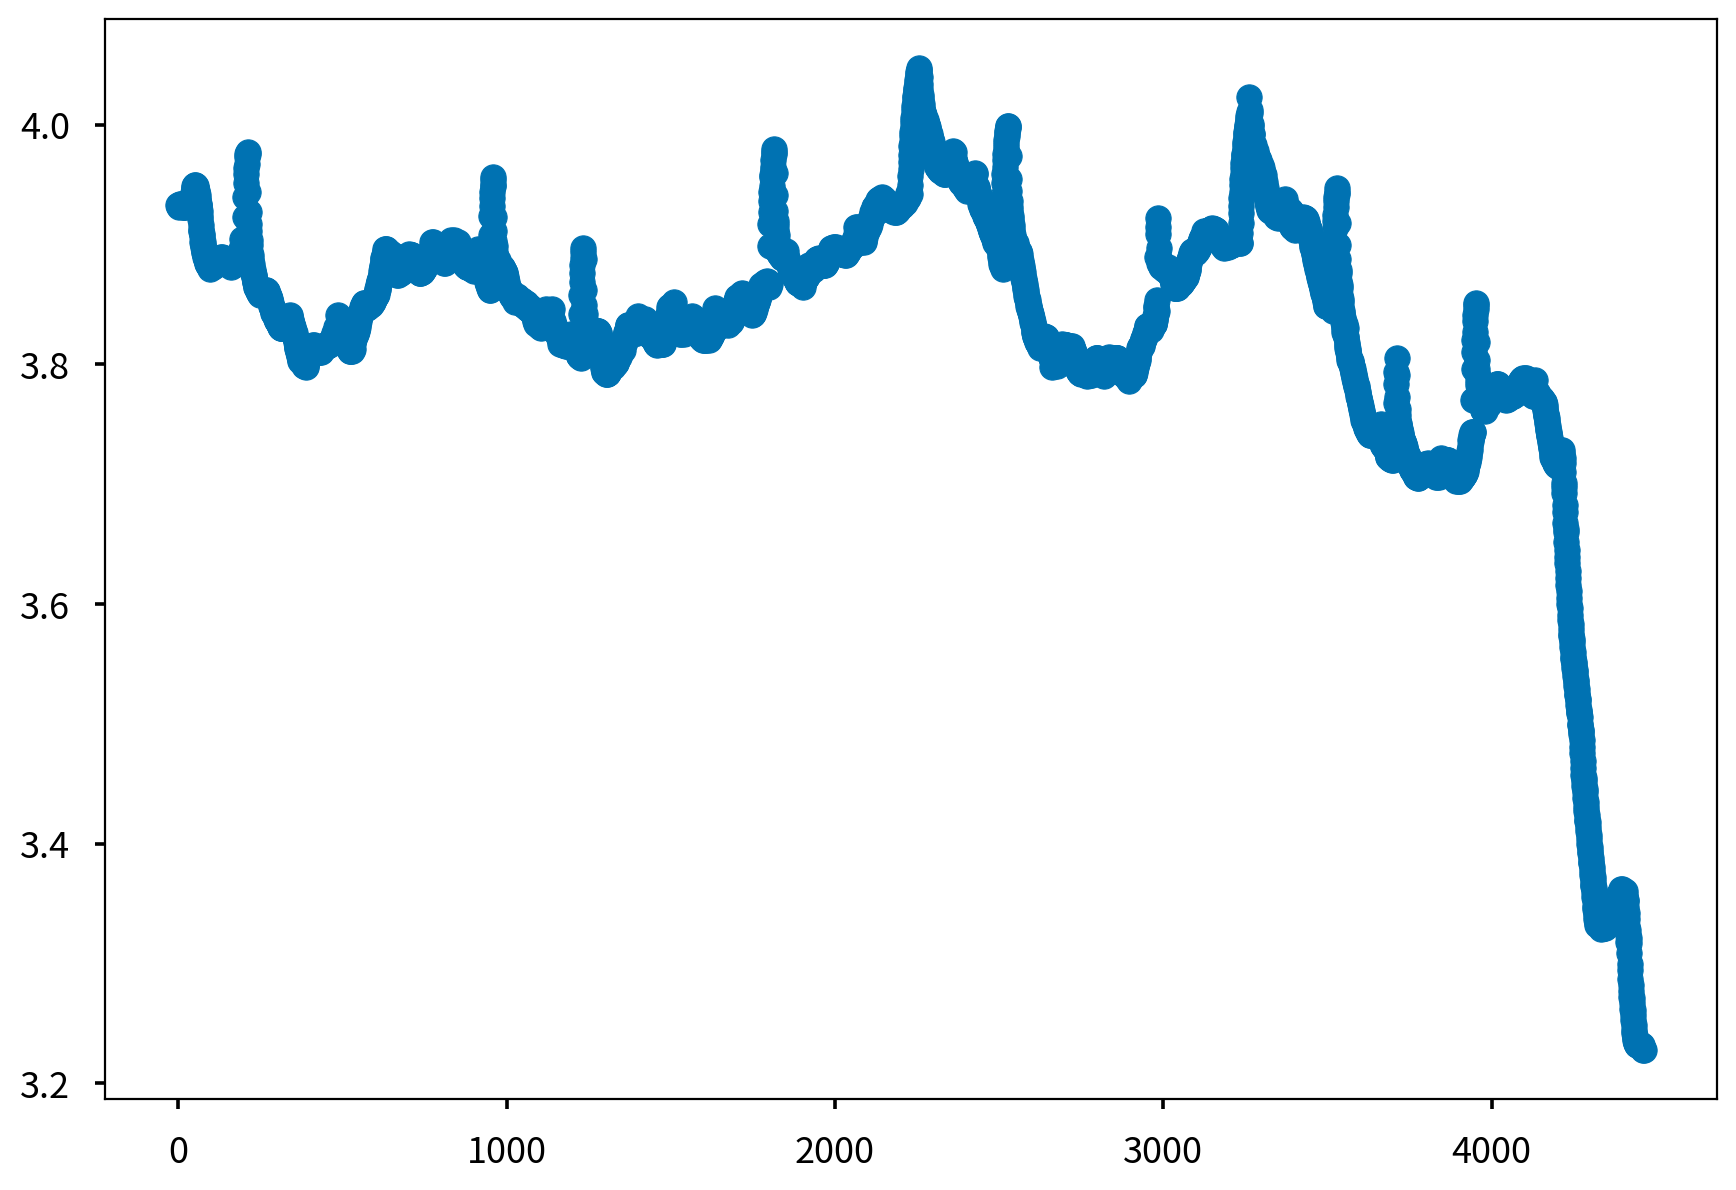

In [34]:
plt.scatter(range(mask.sum()), df['水面至井口深度'])

In [11]:
p

array([-4.73283857e-05,  3.93344013e+00])

In [24]:
test = {
    'de': {'安全': 15, '下限': 14},
    'inc': {'安全': 15, '下限': 14}
}

In [27]:
'de' in test.keys()

True

In [5]:
ep_df = pd.read_csv('data/wl_EP_20211105.csv')
df = pd.read_csv('data/test.csv')

In [6]:
criterias = {
    'decreasing': {
        '安全': '75',
        '下限': '25',
        '嚴重': '10'
    },
    'increasing': {
        '安全': '85',
        '下限': '35',
        '嚴重': '20'
    } 
}
criteria = '安全'

In [25]:
X = df[df['井號'] == 7010111].copy()
mask = (ep_df['月'] == X['月'].values[-1]) & (ep_df['井號'] == str(X['井號'].values[-1]))
print(ep_df.loc[mask, criterias['decreasing'][criteria]])
if X['水面至井口深度'].values[-1] > ep_df.loc[mask, criterias['decreasing'][criteria]].values[0]:
    print('ddd')

4341    3.75
Name: 75, dtype: float64
ddd


In [19]:
ep_df

,井名,井號,Lon,Lat,月,10,20,25,35,75,85
0,二崙國小,4413,120.415102,23.771842,1,4.04,4.24,4.32,4.46,4.96,5.13
1,二崙國小,4413,120.415102,23.771842,4,4.31,4.51,4.59,4.72,5.21,5.38
2,二崙國小,4413,120.415102,23.771842,5,3.77,4.04,4.14,4.31,4.95,5.17
3,二崙國小,4413,120.415102,23.771842,8,2.93,3.17,3.26,3.41,3.99,4.19
4,二崙國小,4413,120.415102,23.771842,10,3.26,3.59,3.72,3.93,4.72,4.99
...,...,...,...,...,...,...,...,...,...,...,...
4487,溫厝(1),9020111,120.512085,23.657709,8,4.83,5.00,5.07,5.18,5.59,5.73
4488,溫厝(1),9020111,120.512085,23.657709,9,5.26,5.36,5.40,5.47,5.73,5.81
4489,溫厝(1),9020111,120.512085,23.657709,10,5.77,5.81,5.83,5.86,5.97,6.00
4490,溫厝(1),9020111,120.512085,23.657709,11,5.96,6.03,6.05,6.10,6.26,6.31


# Why duplicates in the ep_df

In [7]:
for siteid in df['井號'].unique():
    X = df[df['井號'] == siteid].copy()
    mask = (ep_df['月'] == X['月'].values[-1]) & (ep_df['井號'] == str(X['井號'].values[-1]))
    print(ep_df.loc[mask, criterias['decreasing'][criteria]])

4341    3.75
Name: 75, dtype: float64
4364    10.01
Name: 75, dtype: float64
4376    14.28
Name: 75, dtype: float64
4388    14.31
Name: 75, dtype: float64
4400    6.22
Name: 75, dtype: float64
4424    11.26
Name: 75, dtype: float64
4050    2.76
4436    2.74
Name: 75, dtype: float64
3906    6.76
4460    7.05
Name: 75, dtype: float64
3714    7.50
4448    7.29
Name: 75, dtype: float64
2454    7.96
4472    9.06
Name: 75, dtype: float64
2466    4.85
4305    5.31
Name: 75, dtype: float64
2478    9.64
4329    9.25
Name: 75, dtype: float64
2490    8.68
4317    8.62
Name: 75, dtype: float64
2514    3.24
3930    4.16
Name: 75, dtype: float64
2526    10.69
3942    11.86
Name: 75, dtype: float64
2538    12.68
3954    13.32
Name: 75, dtype: float64
2550    11.61
3774    12.80
Name: 75, dtype: float64
2562    1.87
3786    2.54
Name: 75, dtype: float64
2574    3.62
3798    4.81
Name: 75, dtype: float64
2586    3.89
3810    3.90
Name: 75, dtype: float64
2598    25.19
3822    21.41
Name: 75, dtype: flo

In [8]:
id = pd.Series(['{}_{}'.format(siteid, mon) for siteid, mon in zip(ep_df['井號'], ep_df['月'])])
id[id.duplicated()]

614      9080251_1
615      9080251_2
616      9080251_3
617      9080251_4
618      9080251_5
           ...    
4475     7040141_8
4476     7040141_9
4477    7040141_10
4478    7040141_11
4479    7040141_12
Length: 1659, dtype: object

In [9]:
ep_df[ep_df['井號'] == '7040141']

,井名,井號,Lon,Lat,月,10,20,25,35,75,85
2450,線西(4),7040141,120.467625,24.132139,1,5.11,5.99,6.33,6.91,9.04,9.77
2451,線西(4),7040141,120.467625,24.132139,2,6.58,6.79,6.87,7.00,7.50,7.67
2452,線西(4),7040141,120.467625,24.132139,3,7.00,7.20,7.28,7.41,7.89,8.05
2453,線西(4),7040141,120.467625,24.132139,4,6.93,7.17,7.26,7.41,7.98,8.18
2454,線西(4),7040141,120.467625,24.132139,5,6.73,7.01,7.11,7.30,7.96,8.19
2455,線西(4),7040141,120.467625,24.132139,6,6.54,6.81,6.91,7.09,7.73,7.96
2456,線西(4),7040141,120.467625,24.132139,7,6.71,6.94,7.03,7.19,7.75,7.95
2457,線西(4),7040141,120.467625,24.132139,8,6.68,6.91,7.00,7.15,7.70,7.89
2458,線西(4),7040141,120.467625,24.132139,9,6.58,6.80,6.89,7.04,7.59,7.78
2459,線西(4),7040141,120.467625,24.132139,10,6.74,6.94,7.01,7.15,7.63,7.80


In [10]:
df['井號'].unique()

array([ 7010111,  7010121,  7010211,  7010221,  7020111,  7020121,
        7040111,  7040121,  7040131,  7040141,  7050112,  7050122,
        7050132,  7060111,  7060121,  7060131,  7060141,  7080111,
        7080112,  7080121,  7080122,  7080131,  7080132,  7080141,
        7100112,  7100211,  7100221,  7110122,  7120111,  7120121,
        7140111,  7140121,  7140131,  7170211,  7200112,  7200121,
        7200132,  7200212,  7200222,  7210111,  7210121,  7220211,
        7220221,  7220231,  7230312,  7230322,  7230332,  7240112,
        7240122,  7240213,  7240223,  7240232,  7260122,  8040111,
        8040121,  8040212,  8040222,  8040311,  8060111,  8060121,
        8060211,  8060221,  9010112,  9010122,  9010132,  9010142,
        9010212,  9010222,  9010231,  9020111,  9020121,  9040231,
        9050111,  9050121,  9050211,  9050321,  9060212,  9070112,
        9070122,  9070131,  9070311,  9080111,  9080122,  9080132,
        9080211,  9080231,  9080251,  9100211,  9100221,  9110

In [12]:
for siteid in merge_df['井號'].unique():
    for mon in range(1, 13):
        print(siteid, mon)

4413 1
4413 2
4413 3
4413 4
4413 5
4413 6
4413 7
4413 8
4413 9
4413 10
4413 11
4413 12
4403 1
4403 2
4403 3
4403 4
4403 5
4403 6
4403 7
4403 8
4403 9
4403 10
4403 11
4403 12
4409 1
4409 2
4409 3
4409 4
4409 5
4409 6
4409 7
4409 8
4409 9
4409 10
4409 11
4409 12
4414 1
4414 2
4414 3
4414 4
4414 5
4414 6
4414 7
4414 8
4414 9
4414 10
4414 11
4414 12
4428 1
4428 2
4428 3
4428 4
4428 5
4428 6
4428 7
4428 8
4428 9
4428 10
4428 11
4428 12
4765 1
4765 2
4765 3
4765 4
4765 5
4765 6
4765 7
4765 8
4765 9
4765 10
4765 11
4765 12
4419 1
4419 2
4419 3
4419 4
4419 5
4419 6
4419 7
4419 8
4419 9
4419 10
4419 11
4419 12
4406 1
4406 2
4406 3
4406 4
4406 5
4406 6
4406 7
4406 8
4406 9
4406 10
4406 11
4406 12
4207 1
4207 2
4207 3
4207 4
4207 5
4207 6
4207 7
4207 8
4207 9
4207 10
4207 11
4207 12
4401 1
4401 2
4401 3
4401 4
4401 5
4401 6
4401 7
4401 8
4401 9
4401 10
4401 11
4401 12
4654 1
4654 2
4654 3
4654 4
4654 5
4654 6
4654 7
4654 8
4654 9
4654 10
4654 11
4654 12
4766 1
4766 2
4766 3
4766 4
4766 5
4766 6
4

Okay, the duplicated siteids do happen twice in this loop of .unique(), so apperently the identical siteids are actually different in pd.unique(). Maybe they are in different type, int and str.

In [15]:
siteids = []
for siteid in merge_df['井號'].unique():
    siteids.append(siteid)
siteids = pd.Series(siteids)
siteids.dtype

dtype('O')

In [16]:
siteids[siteids.duplicated()]

Series([], dtype: object)

In [18]:
siteids[siteids == 7040141]

406    7040141
dtype: object

In [19]:
siteids[siteids == '7040141']

237    7040141
dtype: object

The theory has been proved....

# Why the length is not matched

In [28]:
import visualization

df = pd.read_csv('data/test.csv')
select = visualization.Select()
out_df, check_list = select.SitebyEP(df=df)#.to_csv('results/out.csv')

In [29]:
out_df

,0
井名,國聖(1)
井號,7010111
水面至井口深度,3.893
Lon,120.569126
Lat,24.092658
...,...
井號,7170211
水面至井口深度,7.64
Lon,120.593717
Lat,23.900657


In [34]:
pd.concat([out_df, df.iloc[-1, :]], join='outer', axis=0)

,0
井名,國聖(1)
井號,7010111
水面至井口深度,3.893
Lon,120.569126
Lat,24.092658
...,...
井號,10090141
水面至井口深度,20.264
Lon,120.154469
Lat,23.460335


Okay, just need to change the axis to 1 during convating and do the transpose at the end. 

In [38]:
pd.concat([df.iloc[-2, :], df.iloc[-1, :]], join='outer', axis=1)

,263692,263693
井名,東石(4),東石(4)
日期時間,2021-05-14 23:40:00,2021-05-14 23:50:00
井號,10090141,10090141
水面至井口深度,20.274,20.264
Lon,120.154469,120.154469
Lat,23.460335,23.460335
月,5,5


In [30]:
df['井號'].unique()

array([ 7010111,  7010121,  7010211,  7010221,  7020111,  7020121,
        7040111,  7040121,  7040131,  7040141,  7050112,  7050122,
        7050132,  7060111,  7060121,  7060131,  7060141,  7080111,
        7080112,  7080121,  7080122,  7080131,  7080132,  7080141,
        7100112,  7100211,  7100221,  7110122,  7120111,  7120121,
        7140111,  7140121,  7140131,  7170211,  7200112,  7200121,
        7200132,  7200212,  7200222,  7210111,  7210121,  7220211,
        7220221,  7220231,  7230312,  7230322,  7230332,  7240112,
        7240122,  7240213,  7240223,  7240232,  7260122,  8040111,
        8040121,  8040212,  8040222,  8040311,  8060111,  8060121,
        8060211,  8060221,  9010112,  9010122,  9010132,  9010142,
        9010212,  9010222,  9010231,  9020111,  9020121,  9040231,
        9050111,  9050121,  9050211,  9050321,  9060212,  9070112,
        9070122,  9070131,  9070311,  9080111,  9080122,  9080132,
        9080211,  9080231,  9080251,  9100211,  9100221,  9110

# Demo

In [2]:
import visualization

# use the 2021-05-01 to 2021-05-15 as the toy data
df = pd.read_csv('data/test.csv')
select = visualization.Select()
out_df= select.SitebyEP(df=df, criteria='安全')#.to_csv('results/out.csv')

In [3]:
out_df

,井名,井號,水面至井口深度,Lon,Lat,月,wl_check
2021-05-14 23:50:00,國聖(1),7010111,3.893,120.569126,24.092658,5,pass
2021-05-14 23:50:00,東榮(1),10050111,39.126,120.435512,23.557506,5,pass
2021-05-14 23:50:00,安和(1),10070111,21.695,120.312655,23.514751,5,pass
2021-05-14 23:50:00,和豐(1),9160212,20.494,120.231564,23.737339,5,pass
2021-05-13 08:20:00,芳苑(1),7230312,14.283,120.327834,23.920473,5,pass
...,...,...,...,...,...,...,...
2021-05-14 23:50:00,明德(3),9180331,24.969,120.199259,23.652903,5,pass
2021-05-06 08:30:00,大溝(1),9200211,38.773,120.210658,23.566151,5,pass
2021-05-14 23:50:00,文昌(4),7060141,14.036,120.419559,24.008117,5,pass
2021-05-14 23:50:00,花壇(1),7080111,2.508,120.543393,24.026659,5,no


In [4]:
select.SitebyEP(df=df, criteria='亂填')

Please set the criteria in the list of dict_keys(['安全', '下限', '嚴重'])
